<a href="https://colab.research.google.com/github/georgegherghe/openrpa/blob/master/Stock2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import the lib
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Get the stock quote
df = web.DataReader('AAOI', data_source='yahoo', start='2016-01-01', end='2021-02-18')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,17.100000,16.280001,16.959999,16.290001,385500,16.290001
2016-01-05,16.360001,15.600000,16.299999,16.080000,322600,16.080000
2016-01-06,16.110001,15.688000,15.700000,16.049999,258700,16.049999
2016-01-07,16.030001,14.920000,15.480000,15.290000,374300,15.290000
2016-01-08,15.690000,14.650000,15.420000,14.790000,222400,14.790000
...,...,...,...,...,...,...
2021-02-11,12.380000,11.600000,11.900000,12.360000,522300,12.360000
2021-02-12,12.640000,12.020000,12.590000,12.250000,455300,12.250000
2021-02-16,12.970000,12.080000,12.300000,12.830000,746000,12.830000


In [5]:
#Get the number of rows & columns
df.shape

(1291, 6)

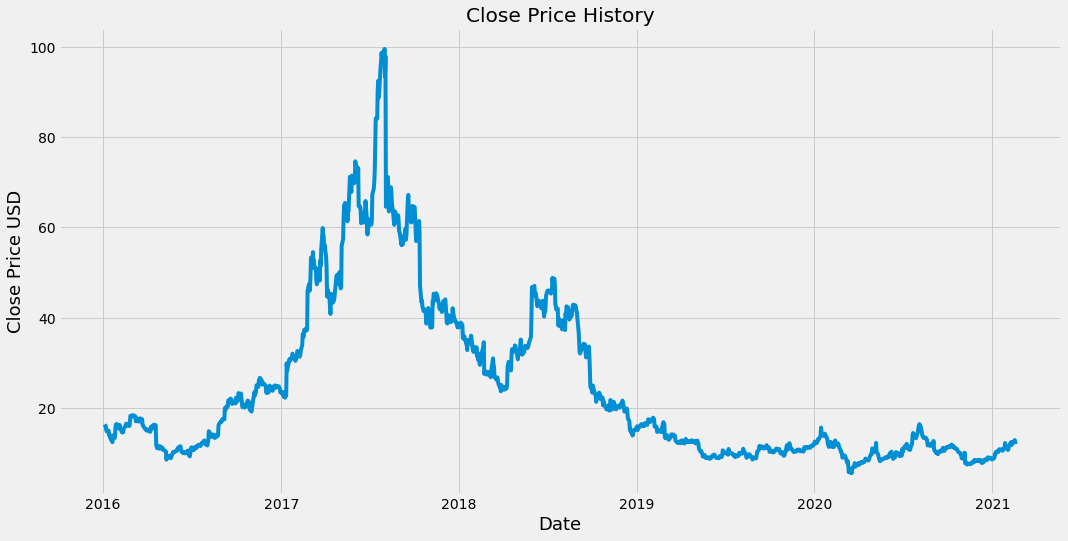

In [6]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()


In [7]:
#Create a new dataframe only with close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1033

In [8]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.11465307],
       [0.11242163],
       [0.11210285],
       ...,
       [0.07788758],
       [0.07289342],
       [0.06843056]])

In [11]:
#Create the training data set
#Create the scaled data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train dataset
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.11465307, 0.11242163, 0.11210285, 0.1040272 , 0.09871427,
       0.0978642 , 0.10020189, 0.09000106, 0.09201997, 0.08415684,
       0.07554988, 0.07289342, 0.07895017, 0.089151  , 0.082988  ,
       0.10243333, 0.11454681, 0.11444055, 0.11550314, 0.11125279,
       0.1053023 , 0.10540856, 0.11316544, 0.10572734, 0.09754543,
       0.09595154, 0.0960578 , 0.09616406, 0.10413346, 0.11135904,
       0.11614069, 0.11656571, 0.11135904, 0.11497184, 0.11635321,
       0.11125279, 0.12102858, 0.13516097, 0.13271703, 0.13632983,
       0.1359048 , 0.13622356, 0.1353735 , 0.1340984 , 0.12209117,
       0.12240995, 0.12262247, 0.12867921, 0.12697907, 0.1212411 ,
       0.12644777, 0.12910423, 0.12814791, 0.12708532, 0.1132717 ,
       0.11178409, 0.10934013, 0.10307087, 0.101477  , 0.10381469])]
[0.09998937186678823]

[array([0.11465307, 0.11242163, 0.11210285, 0.1040272 , 0.09871427,
       0.0978642 , 0.10020189, 0.09000106, 0.09201997, 0.08415684,
       0.07554988, 0.07289342, 0.07

In [12]:
#Convert the x_train and y_train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [15]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(973, 60, 1)

In [17]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [18]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
#Train the model .
model.fit(x_train, y_train, batch_size=1, epochs=1)

973/973 [==============================] - 25s 23ms/step - loss: 0.0064


In [38]:
#Create the testing dataset
#Create a new array containing scaled values form 1231 to 1291
test_data = scaled_data[training_data_len - 60:, :]
#Create the data set x_test, y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [40]:
#Convert the data to a numpy array
x_test = np.array(x_test)


(258, 60)

In [41]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [42]:
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [44]:
#Get the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.5748408931170323

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
